In [187]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load the training and test datasets
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [188]:
from sklearn.model_selection import train_test_split
X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)
len(X_train), len(X_test), len(X_val)


(90, 30, 30)

In [189]:
# Intialize the weights
no_of_features = X_train.shape[1]
no_of_classes = y_train.nunique()

w = np.ones((no_of_features,no_of_classes))
b = np.ones(no_of_classes)

# Calculate the z linear combinations
z = np.dot(X_train,w)+b 


def softmax_regression(z):
    # calculate the softmax probabilities
    numerator = np.exp(z)
    denominator = np.sum(numerator, axis = 1, keepdims= True) # Sum across classes for each sample
    y_pred_probab = numerator/denominator
    # y_pred = np.array([np.argmax(i) for i in y_pred_probab])
    return y_pred_probab

def cross_entropy_log(y_true,y_pred_probab):
    epsilon = 1e-12
    y_pred = np.clip(y_pred_probab, epsilon ,1-epsilon)
    ce_loss = -np.sum(y_true * np.log(y_pred_probab)/y_true.shape[0])
    return ce_loss

    

In [190]:
# One-hot encode y_train to match the output dimensions of y_pred
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Convert y_train to one-hot encoded format
y_train_encoded = one_hot_encode(y_train, no_of_classes)

In [212]:

# Gradient Descent Function
def gradient_descent(X_train, y_train, num_iterations, learning_rate):
    global w, b
    losses = [] # list to store the loss at each iteration
    for i in range(num_iterations):
        # Compute the z linear combination
        z = np.dot(X_train, w) + b
        
        # Get predictions from the softmax function
        y_pred_probab = softmax_regression(z)

        # Compute the cross-entropy loss
        loss = cross_entropy_log(y_train, y_pred_probab)
        # print(f"Iteration {i+1}, Loss: {loss}")
        losses.append(loss)  # Store the loss

        # Compute the gradients
        error = y_pred_probab - y_train
        w_gradient = np.dot(X_train.T, error) / X_train.shape[0]
        b_gradient = np.mean(error, axis=0)

        # Update weights and biases
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

    return losses

# Example usage:
# Assuming y_train_encoded is the one-hot encoded version of y_train
loss = gradient_descent(X_train, y_train_encoded, num_iterations=100, learning_rate=5.2)
print(loss)

[0.0014946961414731143, 0.001493087309354669, 0.001491482016491133, 0.0014898802511517076, 0.0014882820016573505, 0.0014866872563805717, 0.0014850960037450665, 0.0014835082322255388, 0.0014819239303472797, 0.0014803430866860957, 0.0014787656898678223, 0.0014771917285681191, 0.0014756211915122692, 0.0014740540674748688, 0.0014724903452794753, 0.0014709300137984648, 0.0014693730619527348, 0.0014678194787113856, 0.001466269253091442, 0.0014647223741577583, 0.0014631788310225584, 0.0014616386128452666, 0.0014601017088323052, 0.001458568108236749, 0.001457037800358141, 0.0014555107745421734, 0.0014539870201805164, 0.0014524665267105256, 0.0014509492836149464, 0.0014494352804218763, 0.0014479245067042323, 0.0014464169520796836, 0.001444912606210443, 0.0014434114588029177, 0.0014419134996074834, 0.0014404187184184705, 0.0014389271050734979, 0.0014374386494536882, 0.0014359533414831773, 0.0014344711711289388, 0.0014329921284006138, 0.0014315162033501938, 0.00143004338607187, 0.0014285736667017

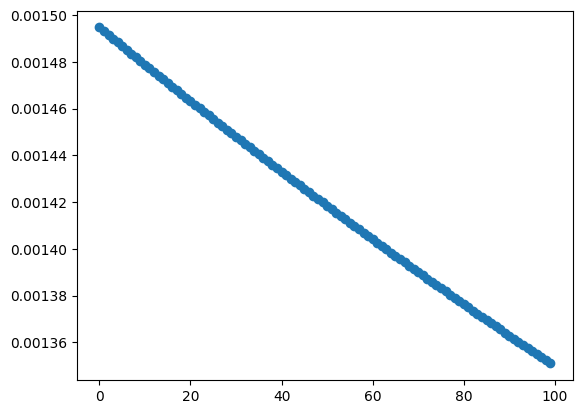

In [213]:
x = np.arange(len(loss))
y = np.array(loss)

import matplotlib.pyplot as plt 
plt.scatter(x,y)